## 授業前課題　ボストン住宅価格　線形回帰

### 線形回帰とは何か
線形回帰とは、2つの変数をとった時、YをXの「関数」として説明できないかを見ることである。例えば、「平均気温」をX、「ビールの売上」をYとすると、YとXの間に何か定量的な法則がないかを探る発想である。 
回帰分析は、蓄積されたデータから法則を読み取る、基本的なツール。2つの変数のうち、より結果に近いもの（目的変数）をY、原因に近いもの（説明変数）をXと置くと、Y＝aX＋b というシンプルな式に落とし込め、直感的に分かりやすく、a、bが数値として得られるので、具体的数値の形でYを予測することができる。  
線形回帰は、連続値をとる目的変数を予測するために使用される。具体的に言うと、そのデータの特徴量の傾向をみて(座標上に線を書いて)、具体的な数字を出す（線上から割り出す）、予測するのが回帰である。  
一方で、分類は、回帰とは違い具体的な数字を出すのではなく、与えられたクラスに分ける（ラベリングする）ことを目的としている。例えば、花弁の数をみて、少ないとパンジー、多いとたんぽぽのように、あらかじめ与えられたクラス（ここでは、パンジーとたんぽぽ）に分けることを分類という。

### 必要なライブラリをimportする

In [1]:
import numpy as np # 線形代数ライブラリ
import matplotlib.pyplot as plt # 描画ライブラリ
import seaborn as sns # 描画ライブラリ
from sklearn.datasets import load_boston # ボストン住宅価格データ
from scipy.stats import zscore # zスコアライブラリ
import pandas as pd # データ操作ライブラリ
from sklearn.linear_model import LinearRegression # 線形回帰モデル
from sklearn.preprocessing import PolynomialFeatures # 多項式モデル
from sklearn.model_selection import train_test_split # テストデータの分割
from sklearn.metrics import mean_squared_error # 平均二乗誤差回帰損失

### 取得データをDataFrameにする
#### ボストン住宅価格ライブラリからデータを取得

In [2]:
# ボストン住宅価格データを読み込み
Instance_BostonData = load_boston() # インスタンスを生成

# 変数にデータをPandas型に変換し、格納
Data = pd.DataFrame(Instance_BostonData.data,columns=Instance_BostonData.feature_names) # 説明変数データ
HousePrices = pd.DataFrame(Instance_BostonData.target,columns={"HousePrices"})  # 目的変数データ（住宅価格）

# 説明変数データの先頭５行表示
print(Data.head())

      CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD    TAX  \
0  0.00632  18.0   2.31   0.0  0.538  6.575  65.2  4.0900  1.0  296.0   
1  0.02731   0.0   7.07   0.0  0.469  6.421  78.9  4.9671  2.0  242.0   
2  0.02729   0.0   7.07   0.0  0.469  7.185  61.1  4.9671  2.0  242.0   
3  0.03237   0.0   2.18   0.0  0.458  6.998  45.8  6.0622  3.0  222.0   
4  0.06905   0.0   2.18   0.0  0.458  7.147  54.2  6.0622  3.0  222.0   

   PTRATIO       B  LSTAT  
0     15.3  396.90   4.98  
1     17.8  396.90   9.14  
2     17.8  392.83   4.03  
3     18.7  394.63   2.94  
4     18.7  396.90   5.33  


### 説明変数を'LSTAT'のみにする
LSTAT:給与の低い職業に従事する人口の割合 (%)

※head()メソッドなどを使用して、データを確認する。
1.x.head()
2.y.head()

In [3]:
# データから今回の対象となる目的変数「LSTAT」を抽出
DataLstat = Data["LSTAT"]  # LSAST：給与

# 先頭の５行を表示
print("-- Data LSTAT --")
print(DataLstat.head())  # 説明変数となるData_Lstat（給与）
print("-----------------------------")
print("--House prices--")
print(HousePrices.head())  # 目的変数となるHousePrices（住宅価格）

-- Data LSTAT --
0    4.98
1    9.14
2    4.03
3    2.94
4    5.33
Name: LSTAT, dtype: float64
-----------------------------
--House prices--
   HousePrices
0         24.0
1         21.6
2         34.7
3         33.4
4         36.2


### 単回帰と重回帰についての違いを記述せよ
単回帰は、Yを説明する、おそらく無数にある要素のうち、一つ変数Xに代表させて説明しようとしている。
メリットとしては、要素を絞り込んだことによるシンプルさ、メッセージの明確さであり、 ヒントになる異常値の発見がしやすい。例えば、経営者が、「このビジネスの本質（因果）は何か？」を考える、ときなどに使う。  
一方で、重回帰は、事象を複数の変数で説明しようとしている。（通常のビジネス事象は、複数の要素が絡み合って発生しているので）より実態に近い予測式ができる。売上を予測したいマーケティング担当者や出店担当者など、より現場に近い人々が、実務に使う数字を予測したいときに使う。

### テストデータに分割する

In [4]:
# データセットのデータを8対２（トレーニング対テスト）に分ける
(DataLstat_train,DataLstat_test,
HousePrices_train,HousePrices_test) = train_test_split(DataLstat, HousePrices, test_size=0.2, random_state=0)
# テスト20% 分割はランダムなし

# 各データの形状を確認
print("DataLstat:TrainSize{}, TestSize:{}" .format(DataLstat_train.shape,DataLstat_test.shape))
print("HousePrices:TrainSize{}, TestSize:{}" .format(HousePrices_train.shape,HousePrices_test.shape))

DataLstat:TrainSize(404,), TestSize:(102,)
HousePrices:TrainSize(404, 1), TestSize:(102, 1)


### 学習

In [5]:
# 線形回帰モデル
lin_1d = LinearRegression() # 線形モデルインスタンスの生成

# 線形回帰によるモデル生成
lin_1d.fit(DataLstat_train[:,None], HousePrices_train) # DataLstat_trainをベクトルから行列に変換

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/linear_model/base.py:485: RuntimeWarning: internal gelsd driver lwork query error, required iwork dimension not returned. This is likely the result of LAPACK bug 0038, fixed in LAPACK 3.2.2 (released July 21, 2010). Falling back to 'gelss' driver.
  linalg.lstsq(X, y)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

### 決定係数

In [6]:
# 線形モデル決定係数
score_1d = lin_1d.score(DataLstat_test[:,None], HousePrices_test)
print("一次式における'LSTAT'の住宅価格への決定係数は%.2f"%(score_1d))

一次式における'LSTAT'の住宅価格への決定係数は0.43


### 決定係数とは何か記述せよ
決定係数とは、回帰分析によって求められた目的変数の予測値が、実際の目的変数の値とどのくらい一致しているかを表している指標であり、以下の式で表される。  決定係数＝（平均から回帰式上の推計値までの距離の二乗の和）÷（平均から各点までの距離の二乗の和）  
決定係数について解説すると、各点の値＝回帰式上の推計値＋回帰式の誤差（＝各点の値と回帰式上の推計値との差）と考えることが出来る。
この場合の回帰式の誤差に関して、以下の式が成り立つことが証明されている。  
（平均から各点までの距離の二乗の和） ＝（平均から回帰式上の推計値までの距離の二乗の和） ＋（回帰式上の誤差の二乗の和）  
意味合いとしては、全変動 ＝ 回帰で説明できる変動 ＋ 回帰では説明できない変動  よって、決定係数とは、全変動 のうち、 回帰で説明できる変動 の占める割合 と言える。  最も説明変数が、目的変数を説明できる場合、決定係数は1に限りなく近づく。

### 決定係数をいかなる場合も信じても良いか記述せよ
決定係数は説明変数の数が増えるほど1に近づくという性質を持っている。そのため、説明変数の数が多い場合には、この点を補正した自由度調整済み決定係数を使用する。  
自由調整済み決定係数さえ高ければなんでもよい」という考え方は不適切である。分析を行うからにはその目的があり、検証したい仮説があるはずであるが、こうした目的や仮説とは一切関係ない変数を、決定係数が上がるからという理由だけで無秩序に分析に加えてしまうと、そのモデルは解釈が難しくなり当初の目的を果たせなくなる。  
また、決定係数はあくまで「予測の当てはまりの良さ」を表す指標である。分析の目的が「ある変数の値を予測したい」の場合には適切な指標だが、「雨が降った日数がコンビニの月間の売上に影響があるかどうか知りたい」のように、ある変数の影響の有無が主眼であり予測は重視しない場合には、決定係数に注目することはあまり意味がないと言える。この場合には「雨が降った日数」という説明変数の回帰係数や、その係数に対する検定の結果（有意かどうか）にまず注目すべきである。

### 2,3,4次式の回帰
モデル生成

In [7]:
# 回帰モデルのインスタンス読込み
lin_2d = LinearRegression()
lin_3d = LinearRegression()
lin_4d = LinearRegression()

# 2,3,4次の多項式生成
degree_2 = PolynomialFeatures(2)
degree_3 = PolynomialFeatures(3)
degree_4 = PolynomialFeatures(4)

# データを2,3,4次に合うように変換 
x_train_2 = degree_2.fit_transform(DataLstat_train[:,None])
x_train_3 = degree_3.fit_transform(DataLstat_train[:,None])
x_train_4 = degree_4.fit_transform(DataLstat_train[:,None])

# 予測モデル生成
lin_2d.fit(x_train_2, HousePrices_train)
lin_3d.fit(x_train_3, HousePrices_train)
lin_4d.fit(x_train_4, HousePrices_train)

# 予測モデルをテスト
x_test_2 = degree_2.fit_transform(DataLstat_test[:,None])
x_test_3 = degree_3.fit_transform(DataLstat_test[:,None])
x_test_4 = degree_4.fit_transform(DataLstat_test[:,None])

# 決定係数算出
score_2d = lin_2d.score(x_test_2, HousePrices_test)
score_3d = lin_3d.score(x_test_3, HousePrices_test)
score_4d = lin_4d.score(x_test_4, HousePrices_test)

print("二次式における'LSTAT'の住宅価格への決定係数は%.2f"%score_2d)
print("三次式における'LSTAT'の住宅価格への決定係数は%.2f"%score_3d)
print("四次式における'LSTAT'の住宅価格への決定係数は%.2f"%score_4d)

二次式における'LSTAT'の住宅価格への決定係数は0.52
三次式における'LSTAT'の住宅価格への決定係数は0.54
四次式における'LSTAT'の住宅価格への決定係数は0.57


### 次数が大きくなるとどうなるか記述せよ
説明変数をXとして、次数を増やしていくと、一般に次式のように表すことができる。
fθ(X) = θ0 + θ1X + θ2X2+ θ3X3 +・・・ + θn Xn　　　（ただし、Xの２乗をX2などと表す）
次元を増やしていくと、メリットとしては、データにフィットしやすくなる。一方で、デメリットとしては、過学習が起きることが挙げられる。



### 重回帰

In [8]:
# 目的変数と各説明変数の相関を求める
Data_join = pd.concat([HousePrices, Data],axis=1)
Data_join.corr()["HousePrices"].abs().sort_values(ascending=False)

HousePrices    1.000000
LSTAT          0.737663
RM             0.695360
PTRATIO        0.507787
INDUS          0.483725
TAX            0.468536
NOX            0.427321
CRIM           0.388305
RAD            0.381626
AGE            0.376955
ZN             0.360445
B              0.333461
DIS            0.249929
CHAS           0.175260
Name: HousePrices, dtype: float64

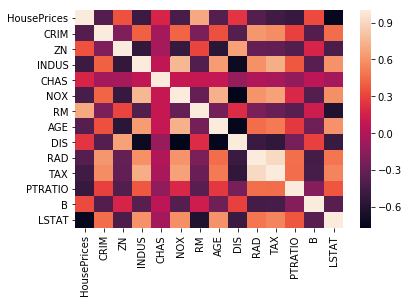

In [9]:
sns.heatmap(Data_join.corr())

In [10]:
# データセットのデータを8対２（トレーニング対テスト）に分ける
(DataLstat_train,DataLstat_test,
HousePrices_train,HousePrices_test) = train_test_split(DataLstat, HousePrices, test_size=0.2, random_state=0)
# テスト20% 分割はランダムなし
x_train, x_test, y_train, y_test = train_test_split(Data, HousePrices, test_size=0.2, random_state=0)

# x_train_multi = x_train.loc[:,["LSTAT","PTRATIO", "INDUS"]]
# x_test_multi = x_test.loc[:,["LSTAT","PTRATIO", "INDUS"]]

x_train_multi = x_train.loc[:,["LSTAT","RM", "DIS", "ZN"]]
x_test_multi = x_test.loc[:,["LSTAT","RM", "DIS", "ZN"]]

degree_2 = PolynomialFeatures(2)
x_tarin = degree_2.fit_transform(x_train_multi)
x_test = degree_2.fit_transform(x_test_multi)

lin_multi = LinearRegression()
lin_multi.fit(x_tarin, y_train)

# 線形モデル決定係数
score_multi = lin_multi.score(x_test, y_test)
print("多重回帰における住宅価格への決定係数は%.2f"%(score_multi))

多重回帰における住宅価格への決定係数は0.71


### 重回帰について記述せよ
複数の特徴量を使う回帰を重回帰という。 特徴量を増やせば、誤差関数の誤差が小さくなり、決定係数の値をより高めることが可能で、予測の精度をより向上させることができるというメリットがある。 ただデメリットとしては次数を増やすことによって決定係数の数値がかなり悪くなってしまうことがある。説明変数を増やし、次数をあげると精度と表現力が向上する一方で過学習がおこってしまうというデメリットがある。